<a href="https://colab.research.google.com/github/wurifah/portofolio/blob/main/another_creditloan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Loan Prediction
Berikut adalah model prediksi untuk memprediksi status pinjaman kredit dari setiap kriteria. Disini terdapat beberapa variabel independent dan variabel dependent. Pada variabel dependent kita bagi kedalam dua kriteria yaitu good borrower dan bad borrower

In [483]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [484]:
df = pd.read_csv('loan_data_2007_2014 (2).csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333583,333583,18544791,20707477,10800,10800,10800.0,60 months,16.99,268.35,D,...,NaN,NaN,NaN,NaN,NaN,NaN,56100.0,NaN,NaN,NaN
333584,333584,21380546,23693442,22400,22400,22400.0,60 months,16.29,548.19,D,...,NaN,NaN,NaN,NaN,NaN,NaN,27900.0,NaN,NaN,NaN
333585,333585,23023098,25375986,10200,10200,10200.0,36 months,18.24,369.99,D,...,NaN,NaN,NaN,NaN,NaN,NaN,22700.0,NaN,NaN,NaN
333586,333586,23043042,25395954,24000,24000,24000.0,36 months,6.03,730.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,165300.0,NaN,NaN,NaN


In [485]:
df.shape

(333588, 75)

Disini terdapat 466285 data baris dan 75 kolom atau kriteria dimana tidak semua kriteria tersebut akan kita gunakan untuk proses pembuatan prediktif model. Yang akan kita lakukan pada tahap selanjutnya adalah proses cleaning data dan feature engineering untuk membuat dataset yang siap untuk dilakukan proses modelling

# Cleaning Data

In [486]:
# Menghapus beberapa kolom yang tidak diperlukan
df.drop(['sub_grade','funded_amnt','funded_amnt_inv','emp_title','verification_status','issue_d','pymnt_plan','url','title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line',
           'inq_last_6mths','mths_since_last_delinq','policy_code','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc',
           'initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
           'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
           'collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint',
           'acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util',
           'open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','all_util','inq_fi'
           ,'total_cu_tl','inq_last_12m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','open_acc_6m','open_il_6m'
           ,'verification_status_joint','annual_inc_joint','annual_inc_joint','id','member_id','desc','Unnamed: 0'],axis=1,inplace=True)

In [488]:
df = df.drop(df[df['loan_status'] == 'Current'].index)
df.shape

(191914, 10)

In [489]:
before_encode = df['loan_status'].value_counts()
print('Loan status sebelum encoding: ', before_encode)

Loan status sebelum encoding:  Fully Paid                                             148672
Charged Off                                             32936
Late (31-120 days)                                       4302
In Grace Period                                          2030
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Late (16-30 days)                                         750
Default                                                   475
Name: loan_status, dtype: int64


In [490]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [491]:
df['loan_status'] = encoder.fit_transform(df['loan_status'])
after_encode = df['loan_status'].value_counts()
print('Loan status sebelum encoding: ', after_encode)

Loan status sebelum encoding:  4    148672
0     32936
7      4302
5      2030
3      1988
2       761
6       750
1       475
Name: loan_status, dtype: int64


In [493]:
status_positif = df[(df['loan_status']==4) | (df['loan_status']==3)]
status_positif['status'] = 'good'


status_negatif = df[(df['loan_status']==0) | (df['loan_status']==1)|(df['loan_status']==2)|(df['loan_status']==5)|(df['loan_status']==6)|(df['loan_status']==7)]
status_negatif['status'] = 'bad'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [496]:
data = pd.concat([status_positif,status_negatif], axis = 0).reset_index(drop=True)

# Feature Engineering
Selanjutnya adalah melakukan feature engineering. Proses ini akan membuat dataset lebih siap untuk proses modeling. Beberapa proses yang akan dilakukan adalah imputasi, deteksi outlier dan penanganan outlier

In [497]:
# Pertama kita deteksi dulu beberapa kolom yang memiliki missing value

data.isna().sum().all

<bound method NDFrame._add_numeric_operations.<locals>.all of loan_amnt            0
term                 0
int_rate             0
installment          0
grade                0
emp_length        7034
home_ownership       0
annual_inc           4
loan_status          0
purpose              0
status               0
dtype: int64>

Terdapat 4 missing value pada kolom annual_inc dan 21.008 missing value pada kolom emp_length. Kita coba untuk tidak menghapus data tersebut dengan mengisi missing value pada kolom emp_length dengan data modusnya karena kolom tersebut merupakan bertipe object, dan mengisi kolom annual_inc dengan nilai mediannya

In [498]:
mode = data['emp_length'].mode()
mode

0    10+ years
dtype: object

In [499]:
data['emp_length'].fillna(mode, inplace=True)

In [500]:
median = data['annual_inc'].median() #mencari nilai median dari kolom annual_inc
median

60000.0

In [501]:
data['annual_inc'].fillna(median, inplace=True) #mengisi kolom annual_inc dengan nilai mediannya

In [502]:
'''pada kolom term, terdapat campuran antara data numerik dan data nominal dimana 
data tersebut terlihat akan mempengaruhi proses modeling. Maka dari itu kita ambil
data numeriknya saja dari kolom term dan menghapus data nominalnya
'''

data['term'] = data['term'].astype(str)
new_term = [item.replace(" months", "") for item in data['term']] # membuat kolom baru dari kolom term tanpa kata ' months'
data['new_term'] = new_term # memasukkan kolom baru ke dataframe
data['new_term'] = data['new_term'].astype(float) #mengubah data baru ke dalam bentuk integer

In [503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191914 entries, 0 to 191913
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       191914 non-null  int64  
 1   term            191914 non-null  object 
 2   int_rate        191914 non-null  float64
 3   installment     191914 non-null  float64
 4   grade           191914 non-null  object 
 5   emp_length      184880 non-null  object 
 6   home_ownership  191914 non-null  object 
 7   annual_inc      191914 non-null  float64
 8   loan_status     191914 non-null  int64  
 9   purpose         191914 non-null  object 
 10  status          191914 non-null  object 
 11  new_term        191914 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 17.6+ MB


In [504]:
data.drop('term',axis=1,inplace=True) # menghapus kolom term yang sudah diperbarui

In [505]:
data.info() #mengecek tipe data setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191914 entries, 0 to 191913
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       191914 non-null  int64  
 1   int_rate        191914 non-null  float64
 2   installment     191914 non-null  float64
 3   grade           191914 non-null  object 
 4   emp_length      184880 non-null  object 
 5   home_ownership  191914 non-null  object 
 6   annual_inc      191914 non-null  float64
 7   loan_status     191914 non-null  int64  
 8   purpose         191914 non-null  object 
 9   status          191914 non-null  object 
 10  new_term        191914 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 16.1+ MB


Berdasarkan data diatas, masih terdapat 6 kolom yang bertipe object. Untuk menanganinya kita ubah data object menjadi data integer dengan melakukan proses encoding

In [506]:
before_grade = data['grade'].value_counts()
before_emp_length = data['emp_length'].value_counts()
before_home_ownership = data['home_ownership'].value_counts()
before_loan_status = data['loan_status'].value_counts()
before_purpose = data['purpose'].value_counts()
print('Jumlah grade sebelum encoding: ', before_grade)
print('Jumlah emp_length sebelum encoding: ', before_emp_length)
print('Jumlah home_ownership sebelum encoding: ', before_home_ownership)
print('Jumlah loan_status sebelum encoding: ', before_loan_status)
print('Jumlah purpose sebelum encoding: ', before_purpose)

Jumlah grade sebelum encoding:  B    59817
C    47640
A    33661
D    29503
E    13724
F     5964
G     1605
Name: grade, dtype: int64
Jumlah emp_length sebelum encoding:  10+ years    55840
2 years      18191
< 1 year     16357
3 years      15742
5 years      14522
1 year       13167
4 years      12752
6 years      11758
7 years      10749
8 years       8722
9 years       7080
Name: emp_length, dtype: int64
Jumlah home_ownership sebelum encoding:  MORTGAGE    93125
RENT        82735
OWN         15826
OTHER         179
NONE           48
ANY             1
Name: home_ownership, dtype: int64
Jumlah loan_status sebelum encoding:  4    148672
0     32936
7      4302
5      2030
3      1988
2       761
6       750
1       475
Name: loan_status, dtype: int64
Jumlah purpose sebelum encoding:  debt_consolidation    110068
credit_card            37231
other                  11750
home_improvement       11174
major_purchase          5237
small_business          4279
car                     3137
m

In [507]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [508]:
data['grade'] = encoder.fit_transform(data['grade'])
data['emp_length'] = encoder.fit_transform(data['emp_length'])
data['home_ownership'] = encoder.fit_transform(data['home_ownership'])
data['loan_status'] = encoder.fit_transform(data['loan_status'])
data['purpose'] = encoder.fit_transform(data['purpose'])

In [509]:
setelah_grade = data['grade'].value_counts()
setelah_emp_length = data['emp_length'].value_counts()
setelah_home_ownership = data['home_ownership'].value_counts()
setelah_loan_status = data['loan_status'].value_counts()
setelah_purpose = data['purpose'].value_counts()
print('Jumlah grade setelah encoding: ', setelah_grade)
print('Jumlah emp_length setelah encoding: ', setelah_emp_length)
print('Jumlah home_ownership setelah encoding: ', setelah_home_ownership)
print('Jumlah loan_status setelah encoding: ', setelah_loan_status)
print('Jumlah purpose setelah encoding: ', setelah_purpose)

Jumlah grade setelah encoding:  1    59817
2    47640
0    33661
3    29503
4    13724
5     5964
6     1605
Name: grade, dtype: int64
Jumlah emp_length setelah encoding:  1     55840
2     18191
10    16357
3     15742
5     14522
0     13167
4     12752
6     11758
7     10749
8      8722
9      7080
11     7034
Name: emp_length, dtype: int64
Jumlah home_ownership setelah encoding:  1    93125
5    82735
4    15826
3      179
2       48
0        1
Name: home_ownership, dtype: int64
Jumlah loan_status setelah encoding:  4    148672
0     32936
7      4302
5      2030
3      1988
2       761
6       750
1       475
Name: loan_status, dtype: int64
Jumlah purpose setelah encoding:  2     110068
1      37231
9      11750
4      11174
6       5237
11      4279
0       3137
7       2171
13      2017
8       1643
5       1349
12      1200
3        422
10       236
Name: purpose, dtype: int64


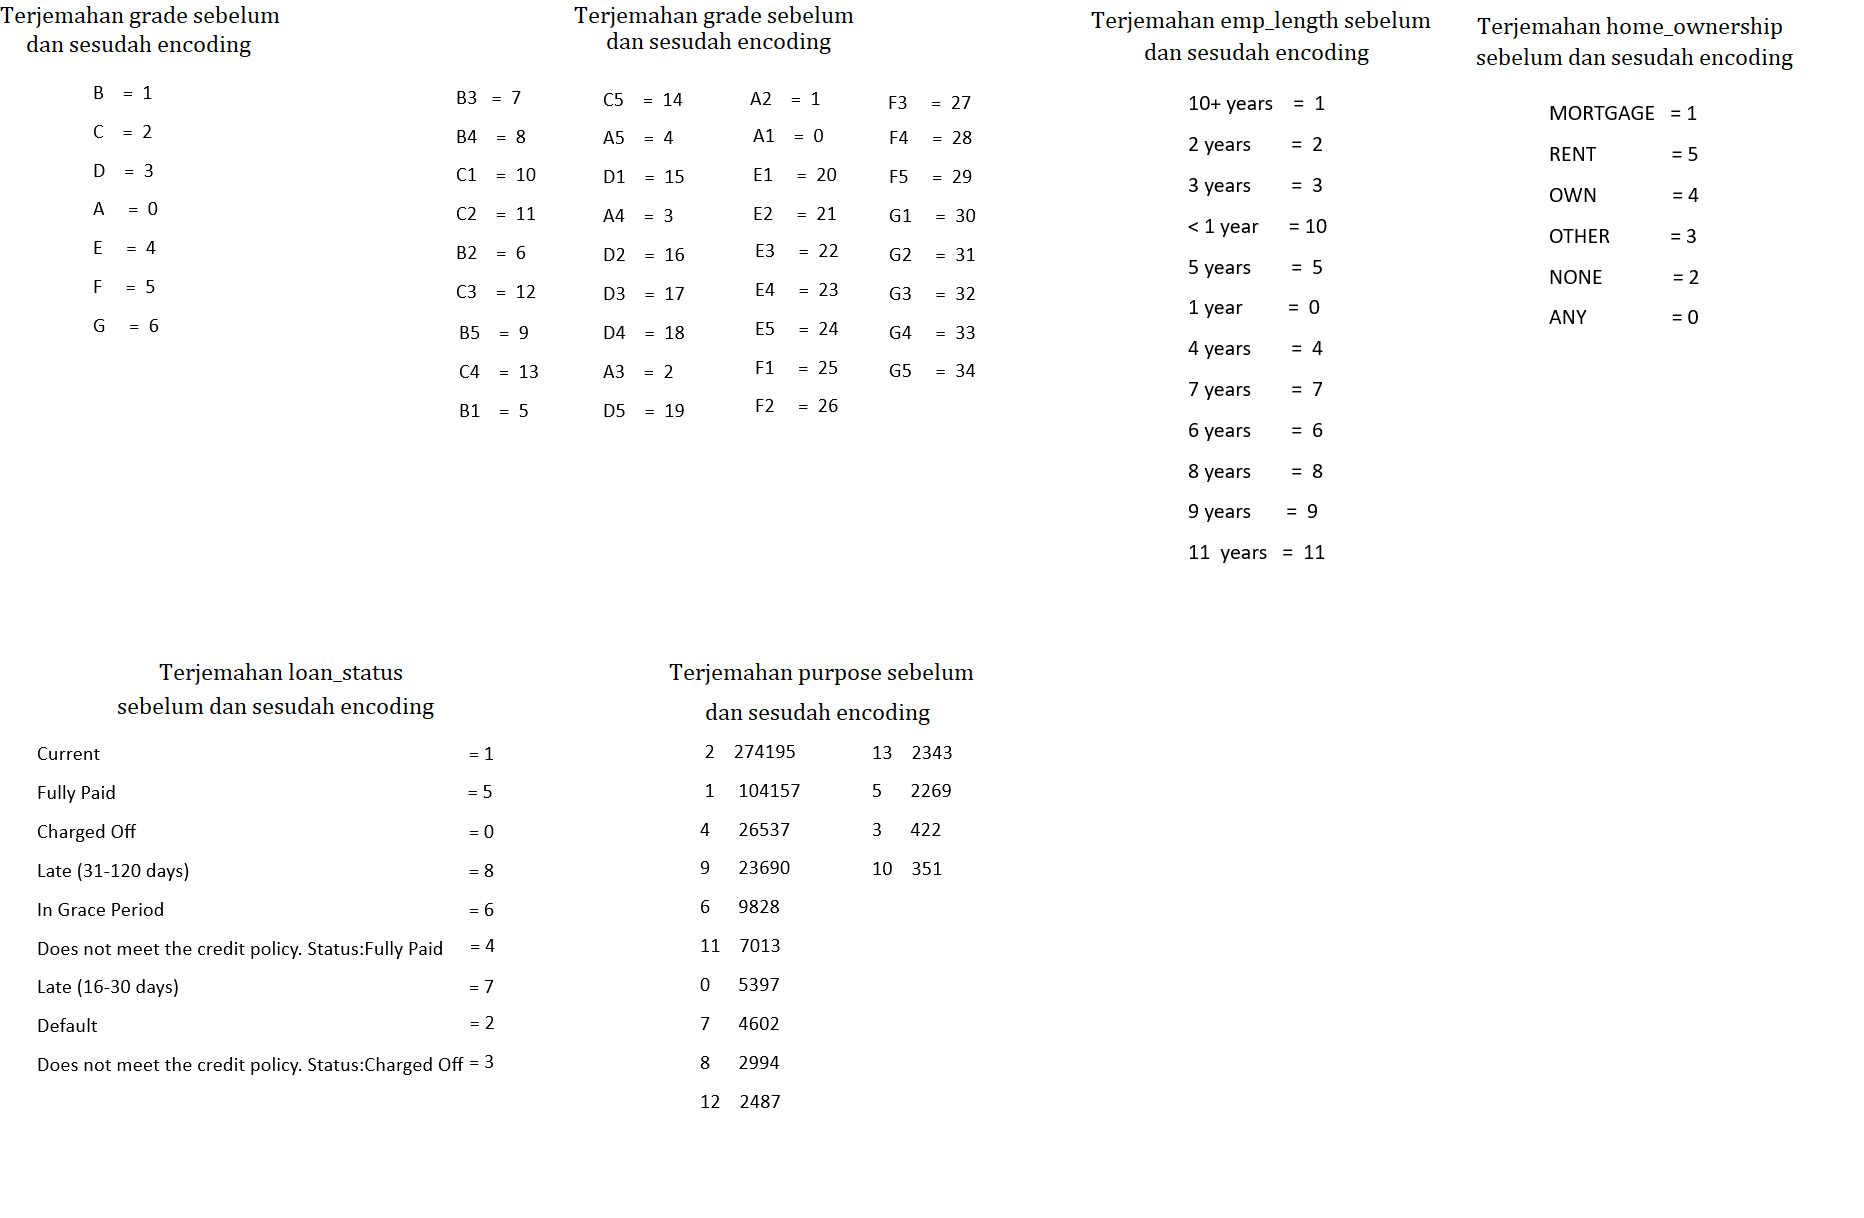

In [510]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191914 entries, 0 to 191913
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       191914 non-null  int64  
 1   int_rate        191914 non-null  float64
 2   installment     191914 non-null  float64
 3   grade           191914 non-null  int64  
 4   emp_length      191914 non-null  int64  
 5   home_ownership  191914 non-null  int64  
 6   annual_inc      191914 non-null  float64
 7   loan_status     191914 non-null  int64  
 8   purpose         191914 non-null  int64  
 9   status          191914 non-null  object 
 10  new_term        191914 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 16.1+ MB


Semua data sudah berbentuk integer atau float yang bisa dilakukan proses permodelan

Selanjutnya mengecek outlier dengan membuat boxplot dari tiap kolom kecuali kolom yang di encoding

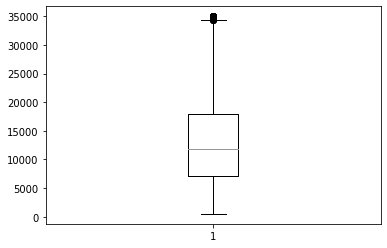

In [511]:
plt.boxplot(data['loan_amnt'])
plt.show()

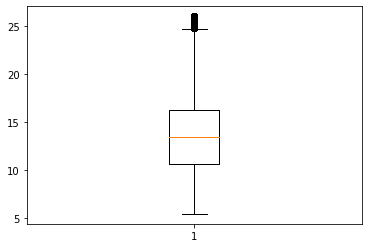

In [512]:
plt.boxplot(data['int_rate'])
plt.show()

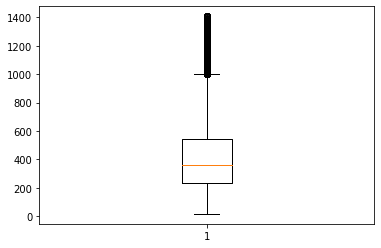

In [513]:
plt.boxplot(data['installment'])
plt.show()

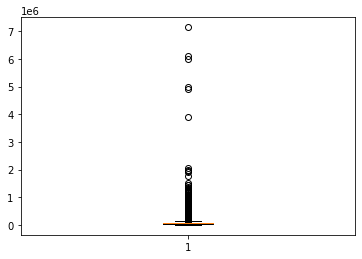

In [514]:
plt.boxplot(data['annual_inc'])
plt.show()

Berdasarkan grafik diatas, pada kolom int_rate, installment dan annual_inc terdapat adanya outlier. Pertama kita analisis jumlah outlier dari ketiga kolom

In [515]:
# Kita lihat analisis statistik dari seluruh kolom

data.describe()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
count,191914.000000,191914.000000,191914.000000,191914.000000,191914.00000,191914.000000,1.919140e+05,191914.000000,191914.000000,191914.000000
mean,13271.097862,13.721519,411.445714,1.760955,4.08150,2.973921,7.134648e+04,3.373454,2.947346,40.966350
std,8008.904649,4.390689,243.015645,1.345144,3.39257,1.935844,5.723745e+04,1.621666,2.733070,9.722564
min,500.000000,5.420000,15.670000,0.000000,0.00000,0.000000,1.896000e+03,0.000000,0.000000,36.000000
25%,7100.000000,10.640000,232.020000,1.000000,1.00000,1.000000,4.400000e+04,4.000000,2.000000,36.000000
50%,11900.000000,13.490000,361.480000,2.000000,3.00000,4.000000,6.000000e+04,4.000000,2.000000,36.000000
75%,18000.000000,16.290000,539.920000,3.000000,7.00000,5.000000,8.500000e+04,4.000000,2.000000,36.000000
max,35000.000000,26.060000,1408.130000,6.000000,11.00000,5.000000,7.141778e+06,7.000000,13.000000,60.000000


Pertama kita menangani nilai outlier pada kolom int_rate berdasarkan data di atas

## int_rate

In [516]:
Q1_intrate = 10.99
Q3_intrate = 16.49

IQR = Q3_intrate - Q1_intrate
min_IQR_int_rate = Q1_intrate - 1.5 * IQR
max_IQR_int_rate = Q3_intrate + 1.5 * IQR

print('IQR minimum int_rate = ', min_IQR_int_rate)
print('IQR maksimum int_rate = ', max_IQR_int_rate)

IQR minimum int_rate =  2.7400000000000038
IQR maksimum int_rate =  24.739999999999995


In [517]:
# Berdasarkan boxplot hanya terdapat high outlier. Maka kita akan mencari data high outlier dari kolom int_rate
data.loc[data['int_rate']>max_IQR_int_rate]

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,status,new_term
34221,35000,25.80,1406.45,6,10,5,180000.0,4,11,good,36.0
34235,1750,24.99,69.58,5,4,5,29000.0,4,2,good,36.0
34242,19600,25.57,581.86,5,5,1,139500.0,4,2,good,60.0
34268,35000,26.06,1049.17,6,1,1,135000.0,4,2,good,60.0
34279,21200,25.99,634.62,6,3,1,93000.0,4,2,good,60.0
...,...,...,...,...,...,...,...,...,...,...,...
191852,6250,24.99,248.47,5,7,5,51000.0,5,2,bad,36.0
191858,5375,25.57,215.34,5,2,5,18000.0,0,2,bad,36.0
191873,16300,25.83,655.27,6,7,1,48000.0,0,11,bad,36.0
191883,13500,25.83,402.84,6,10,5,62000.0,0,2,bad,60.0


Terdapat cukup banyak outlier pada kolom int_rate yang tidak mungkin kita hilangkan, maka kita akan mengisinya dengan nilai maksimum IQR dari kolom tersebut

In [518]:
# Pertama mengambil data outlier
with_int_rate = data.loc[data['int_rate']>max_IQR_int_rate]

Selanjutnya kita membuat kolom baru yang berisi nilai maksimum IQR, namun kita bulatkan menjadi 2 angka di belakang koma yaitu 24.74

In [519]:
with_int_rate['new_int_rate'] = 24.74
with_int_rate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,status,new_term,new_int_rate
34221,35000,25.80,1406.45,6,10,5,180000.0,4,11,good,36.0,24.74
34235,1750,24.99,69.58,5,4,5,29000.0,4,2,good,36.0,24.74
34242,19600,25.57,581.86,5,5,1,139500.0,4,2,good,60.0,24.74
34268,35000,26.06,1049.17,6,1,1,135000.0,4,2,good,60.0,24.74
34279,21200,25.99,634.62,6,3,1,93000.0,4,2,good,60.0,24.74
...,...,...,...,...,...,...,...,...,...,...,...,...
191852,6250,24.99,248.47,5,7,5,51000.0,5,2,bad,36.0,24.74
191858,5375,25.57,215.34,5,2,5,18000.0,0,2,bad,36.0,24.74
191873,16300,25.83,655.27,6,7,1,48000.0,0,11,bad,36.0,24.74
191883,13500,25.83,402.84,6,10,5,62000.0,0,2,bad,60.0,24.74


In [520]:
# Selanjutnya membuat urutan kolom seperti kolom pada data awal berdasarkan nilai int_rate baru
new_with_int_rate = with_int_rate[['loan_amnt','new_int_rate','installment',
                                  'grade','emp_length','home_ownership','annual_inc','loan_status','purpose','new_term']]
new_with_int_rate

,loan_amnt,new_int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
34221,35000,24.74,1406.45,6,10,5,180000.0,4,11,36.0
34235,1750,24.74,69.58,5,4,5,29000.0,4,2,36.0
34242,19600,24.74,581.86,5,5,1,139500.0,4,2,60.0
34268,35000,24.74,1049.17,6,1,1,135000.0,4,2,60.0
34279,21200,24.74,634.62,6,3,1,93000.0,4,2,60.0
...,...,...,...,...,...,...,...,...,...,...
191852,6250,24.74,248.47,5,7,5,51000.0,5,2,36.0
191858,5375,24.74,215.34,5,2,5,18000.0,0,2,36.0
191873,16300,24.74,655.27,6,7,1,48000.0,0,11,36.0
191883,13500,24.74,402.84,6,10,5,62000.0,0,2,60.0


In [521]:
# Lalu mengganti nama new_int_rate dengan int_rate kembali
new_with_int_rate.rename(columns={'new_int_rate': 'int_rate'}, inplace=True)
new_with_int_rate

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
34221,35000,24.74,1406.45,6,10,5,180000.0,4,11,36.0
34235,1750,24.74,69.58,5,4,5,29000.0,4,2,36.0
34242,19600,24.74,581.86,5,5,1,139500.0,4,2,60.0
34268,35000,24.74,1049.17,6,1,1,135000.0,4,2,60.0
34279,21200,24.74,634.62,6,3,1,93000.0,4,2,60.0
...,...,...,...,...,...,...,...,...,...,...
191852,6250,24.74,248.47,5,7,5,51000.0,5,2,36.0
191858,5375,24.74,215.34,5,2,5,18000.0,0,2,36.0
191873,16300,24.74,655.27,6,7,1,48000.0,0,11,36.0
191883,13500,24.74,402.84,6,10,5,62000.0,0,2,60.0


In [522]:
#Lalu kita menghapus data awal yang nilai int_rate nya >= nilai max IQR
without_int_rate = data.drop(data[data['int_rate'] >= max_IQR_int_rate].index)
without_int_rate

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,status,new_term
0,5000,10.65,162.87,1,1,5,24000.0,4,1,good,36.0
1,2400,15.96,84.33,2,1,5,12252.0,4,11,good,36.0
2,10000,13.49,339.31,2,1,5,49200.0,4,9,good,36.0
3,5000,7.90,156.46,0,3,5,36000.0,4,13,good,36.0
4,3000,18.64,109.43,4,9,5,48000.0,4,0,good,36.0
...,...,...,...,...,...,...,...,...,...,...,...
191909,14450,16.29,353.63,3,0,5,33000.0,7,2,bad,60.0
191910,6000,14.49,206.50,2,4,1,80000.0,0,4,bad,36.0
191911,14000,13.98,325.62,2,0,5,40000.0,7,8,bad,60.0
191912,33950,20.99,1278.90,4,9,5,125000.0,5,2,bad,36.0


In [523]:
#lalu menggabungkan kedua data di atas menjadi data2
data2 = pd.concat([new_with_int_rate, without_int_rate], axis = 0).reset_index(drop=True)
data2

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,status
0,35000,24.74,1406.45,6,10,5,180000.0,4,11,36.0,NaN
1,1750,24.74,69.58,5,4,5,29000.0,4,2,36.0,NaN
2,19600,24.74,581.86,5,5,1,139500.0,4,2,60.0,NaN
3,35000,24.74,1049.17,6,1,1,135000.0,4,2,60.0,NaN
4,21200,24.74,634.62,6,3,1,93000.0,4,2,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
191909,14450,16.29,353.63,3,0,5,33000.0,7,2,60.0,bad
191910,6000,14.49,206.50,2,4,1,80000.0,0,4,36.0,bad
191911,14000,13.98,325.62,2,0,5,40000.0,7,8,60.0,bad
191912,33950,20.99,1278.90,4,9,5,125000.0,5,2,36.0,bad


Selanjutnya kita melakukan hal yang sama ke kolom installment

## installment

In [524]:
data2.describe()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
count,191914.000000,191914.000000,191914.000000,191914.000000,191914.00000,191914.000000,1.919140e+05,191914.000000,191914.000000,191914.000000
mean,13271.097862,13.715222,411.445714,1.760955,4.08150,2.973921,7.134648e+04,3.373454,2.947346,40.966350
std,8008.904649,4.374151,243.015645,1.345144,3.39257,1.935844,5.723745e+04,1.621666,2.733070,9.722564
min,500.000000,5.420000,15.670000,0.000000,0.00000,0.000000,1.896000e+03,0.000000,0.000000,36.000000
25%,7100.000000,10.640000,232.020000,1.000000,1.00000,1.000000,4.400000e+04,4.000000,2.000000,36.000000
50%,11900.000000,13.490000,361.480000,2.000000,3.00000,4.000000,6.000000e+04,4.000000,2.000000,36.000000
75%,18000.000000,16.290000,539.920000,3.000000,7.00000,5.000000,8.500000e+04,4.000000,2.000000,36.000000
max,35000.000000,24.740000,1408.130000,6.000000,11.00000,5.000000,7.141778e+06,7.000000,13.000000,60.000000


In [525]:
Q1_installment = 256.69
Q3_installment = 566.58

IQR_installment = Q3_installment - Q1_installment
min_IQR_installment = Q1_installment - 1.5 * IQR_installment
max_IQR_installment = Q3_installment + 1.5 * IQR_installment

print('IQR minimum installment = ', min_IQR_installment)
print('IQR maksimum installment = ', max_IQR_installment)

IQR minimum installment =  -208.14500000000004
IQR maksimum installment =  1031.415


In [526]:
# Berdasarkan boxplot hanya terdapat high outlier. Maka kita akan mencari data high outlier dari kolom installment
data2.loc[data2['installment']>max_IQR_installment]

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,status
0,35000,24.74,1406.45,6,10,5,180000.0,4,11,36.0,NaN
3,35000,24.74,1049.17,6,1,1,135000.0,4,2,60.0,NaN
7,35000,24.74,1044.40,6,3,1,450000.0,4,11,60.0,NaN
21,35000,24.74,1407.01,6,1,4,85468.0,4,5,36.0,NaN
27,35000,24.74,1045.64,6,5,4,95000.0,4,11,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
191773,35000,24.08,1374.63,5,6,5,110000.0,5,2,36.0,bad
191786,33000,9.17,1052.01,1,10,1,155000.0,5,1,36.0,bad
191835,30000,19.52,1107.59,4,2,1,170000.0,0,2,36.0,bad
191866,30000,15.61,1048.95,3,1,4,201760.0,0,2,36.0,bad


Terdapat cukup banyak outlier yaitu 11.711 baris pada kolom installment yang tidak mungkin kita hilangkan, maka kita akan mengisinya dengan nilai maksimum IQR dari kolom tersebut

In [527]:
# Pertama mengambil data outlier
with_installment = data2.loc[data2['installment']>max_IQR_installment]

Selanjutnya kita membuat kolom baru yang berisi nilai maksimum IQR

In [528]:
with_installment['new_installment'] = 1031.415
with_installment

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,status,new_installment
0,35000,24.74,1406.45,6,10,5,180000.0,4,11,36.0,NaN,1031.415
3,35000,24.74,1049.17,6,1,1,135000.0,4,2,60.0,NaN,1031.415
7,35000,24.74,1044.40,6,3,1,450000.0,4,11,60.0,NaN,1031.415
21,35000,24.74,1407.01,6,1,4,85468.0,4,5,36.0,NaN,1031.415
27,35000,24.74,1045.64,6,5,4,95000.0,4,11,60.0,NaN,1031.415
...,...,...,...,...,...,...,...,...,...,...,...,...
191773,35000,24.08,1374.63,5,6,5,110000.0,5,2,36.0,bad,1031.415
191786,33000,9.17,1052.01,1,10,1,155000.0,5,1,36.0,bad,1031.415
191835,30000,19.52,1107.59,4,2,1,170000.0,0,2,36.0,bad,1031.415
191866,30000,15.61,1048.95,3,1,4,201760.0,0,2,36.0,bad,1031.415


In [529]:
# Selanjutnya membuat urutan kolom seperti kolom pada data awal berdasarkan nilai installment baru
new_with_installment = with_installment[['loan_amnt','int_rate','new_installment',
                                    'grade','emp_length','home_ownership','annual_inc','loan_status','purpose','new_term']]
new_with_installment

,loan_amnt,int_rate,new_installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
0,35000,24.74,1031.415,6,10,5,180000.0,4,11,36.0
3,35000,24.74,1031.415,6,1,1,135000.0,4,2,60.0
7,35000,24.74,1031.415,6,3,1,450000.0,4,11,60.0
21,35000,24.74,1031.415,6,1,4,85468.0,4,5,36.0
27,35000,24.74,1031.415,6,5,4,95000.0,4,11,60.0
...,...,...,...,...,...,...,...,...,...,...
191773,35000,24.08,1031.415,5,6,5,110000.0,5,2,36.0
191786,33000,9.17,1031.415,1,10,1,155000.0,5,1,36.0
191835,30000,19.52,1031.415,4,2,1,170000.0,0,2,36.0
191866,30000,15.61,1031.415,3,1,4,201760.0,0,2,36.0


In [530]:
# Lalu mengganti nama new_installment dengan installment kembali
new_with_installment.rename(columns={'new_installment': 'installment'}, inplace=True)
new_with_installment

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
0,35000,24.74,1031.415,6,10,5,180000.0,4,11,36.0
3,35000,24.74,1031.415,6,1,1,135000.0,4,2,60.0
7,35000,24.74,1031.415,6,3,1,450000.0,4,11,60.0
21,35000,24.74,1031.415,6,1,4,85468.0,4,5,36.0
27,35000,24.74,1031.415,6,5,4,95000.0,4,11,60.0
...,...,...,...,...,...,...,...,...,...,...
191773,35000,24.08,1031.415,5,6,5,110000.0,5,2,36.0
191786,33000,9.17,1031.415,1,10,1,155000.0,5,1,36.0
191835,30000,19.52,1031.415,4,2,1,170000.0,0,2,36.0
191866,30000,15.61,1031.415,3,1,4,201760.0,0,2,36.0


In [531]:
#Lalu kita menghapus data awal yang nilai installment nya >= nilai max IQR
without_installment = data2.drop(data2[data2['installment'] >= max_IQR_installment].index)
without_installment

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,status
1,1750,24.74,69.58,5,4,5,29000.0,4,2,36.0,NaN
2,19600,24.74,581.86,5,5,1,139500.0,4,2,60.0,NaN
4,21200,24.74,634.62,6,3,1,93000.0,4,2,60.0,NaN
5,10000,24.74,293.46,5,6,5,35000.0,4,2,60.0,NaN
6,27575,24.74,809.21,5,1,1,82000.0,4,2,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
191908,9600,11.67,317.35,1,10,5,30000.0,7,2,36.0,bad
191909,14450,16.29,353.63,3,0,5,33000.0,7,2,60.0,bad
191910,6000,14.49,206.50,2,4,1,80000.0,0,4,36.0,bad
191911,14000,13.98,325.62,2,0,5,40000.0,7,8,60.0,bad


In [532]:
#lalu menggabungkan kedua data di atas menjadi data3
data3 = pd.concat([new_with_installment, without_installment], axis = 0).reset_index(drop=True)
data3

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,status
0,35000,24.74,1031.415,6,10,5,180000.0,4,11,36.0,NaN
1,35000,24.74,1031.415,6,1,1,135000.0,4,2,60.0,NaN
2,35000,24.74,1031.415,6,3,1,450000.0,4,11,60.0,NaN
3,35000,24.74,1031.415,6,1,4,85468.0,4,5,36.0,NaN
4,35000,24.74,1031.415,6,5,4,95000.0,4,11,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
191909,9600,11.67,317.350,1,10,5,30000.0,7,2,36.0,bad
191910,14450,16.29,353.630,3,0,5,33000.0,7,2,60.0,bad
191911,6000,14.49,206.500,2,4,1,80000.0,0,4,36.0,bad
191912,14000,13.98,325.620,2,0,5,40000.0,7,8,60.0,bad


Selanjutnya kita melakukan hal yang sama ke kolom annual_inc

## iannual_inc

In [533]:
data3.describe()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
count,191914.000000,191914.000000,191914.000000,191914.000000,191914.00000,191914.000000,1.919140e+05,191914.000000,191914.000000,191914.000000
mean,13271.097862,13.715222,408.271210,1.760955,4.08150,2.973921,7.134648e+04,3.373454,2.947346,40.966350
std,8008.904649,4.374151,233.467163,1.345144,3.39257,1.935844,5.723745e+04,1.621666,2.733070,9.722564
min,500.000000,5.420000,15.670000,0.000000,0.00000,0.000000,1.896000e+03,0.000000,0.000000,36.000000
25%,7100.000000,10.640000,232.020000,1.000000,1.00000,1.000000,4.400000e+04,4.000000,2.000000,36.000000
50%,11900.000000,13.490000,361.480000,2.000000,3.00000,4.000000,6.000000e+04,4.000000,2.000000,36.000000
75%,18000.000000,16.290000,539.920000,3.000000,7.00000,5.000000,8.500000e+04,4.000000,2.000000,36.000000
max,35000.000000,24.740000,1031.415000,6.000000,11.00000,5.000000,7.141778e+06,7.000000,13.000000,60.000000


In [534]:
Q1_annual_inc = 45000
Q3_annual_inc = 88953

IQR_annual_inc = Q3_annual_inc - Q1_annual_inc
min_IQR_annual_inc = Q1_annual_inc - 1.5 * IQR_annual_inc
max_IQR_annual_inc = Q3_annual_inc + 1.5 * IQR_annual_inc

print('IQR minimum annual_inc = ', min_IQR_annual_inc)
print('IQR maksimum annual_inc = ', max_IQR_annual_inc)

IQR minimum annual_inc =  -20929.5
IQR maksimum annual_inc =  154882.5


In [535]:
# Berdasarkan boxplot hanya terdapat high outlier. Maka kita akan mencari data high outlier dari kolom installment
data3.loc[data3['annual_inc']>max_IQR_annual_inc]

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,status
0,35000,24.74,1031.415,6,10,5,180000.0,4,11,36.0,NaN
2,35000,24.74,1031.415,6,3,1,450000.0,4,11,60.0,NaN
10,35000,24.74,1031.415,5,1,5,210000.0,4,11,36.0,NaN
13,35000,24.74,1031.415,5,5,1,265000.0,4,5,36.0,NaN
14,35000,24.74,1031.415,6,5,5,850000.0,4,11,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
191719,25000,10.15,808.450,1,10,1,276000.0,0,2,36.0,bad
191739,20000,13.35,458.660,2,4,1,161000.0,0,1,60.0,bad
191765,20000,14.99,475.700,2,1,1,250000.0,7,1,60.0,bad
191778,20000,18.99,518.710,4,1,1,160000.0,0,2,60.0,bad


Terdapat cukup banyak outlier yaitu 19.899 baris pada kolom annual_inc yang tidak mungkin kita hilangkan, maka kita akan mengisinya dengan nilai maksimum IQR dari kolom tersebut

In [536]:
# Pertama mengambil data outlier
with_annual_inc = data3.loc[data3['annual_inc']>max_IQR_annual_inc]

Selanjutnya kita membuat kolom baru yang berisi nilai maksimum IQR

In [537]:
with_annual_inc['new_annual_inc'] = 154882.5
with_annual_inc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,status,new_annual_inc
0,35000,24.74,1031.415,6,10,5,180000.0,4,11,36.0,NaN,154882.5
2,35000,24.74,1031.415,6,3,1,450000.0,4,11,60.0,NaN,154882.5
10,35000,24.74,1031.415,5,1,5,210000.0,4,11,36.0,NaN,154882.5
13,35000,24.74,1031.415,5,5,1,265000.0,4,5,36.0,NaN,154882.5
14,35000,24.74,1031.415,6,5,5,850000.0,4,11,36.0,NaN,154882.5
...,...,...,...,...,...,...,...,...,...,...,...,...
191719,25000,10.15,808.450,1,10,1,276000.0,0,2,36.0,bad,154882.5
191739,20000,13.35,458.660,2,4,1,161000.0,0,1,60.0,bad,154882.5
191765,20000,14.99,475.700,2,1,1,250000.0,7,1,60.0,bad,154882.5
191778,20000,18.99,518.710,4,1,1,160000.0,0,2,60.0,bad,154882.5


In [538]:
# Selanjutnya membuat urutan kolom seperti kolom pada data awal berdasarkan nilai annual_inc baru
new_with_annual_inc = with_annual_inc[['loan_amnt','int_rate','installment',
                                    'grade','emp_length','home_ownership','new_annual_inc','loan_status','purpose','new_term']]
new_with_annual_inc

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,new_annual_inc,loan_status,purpose,new_term
0,35000,24.74,1031.415,6,10,5,154882.5,4,11,36.0
2,35000,24.74,1031.415,6,3,1,154882.5,4,11,60.0
10,35000,24.74,1031.415,5,1,5,154882.5,4,11,36.0
13,35000,24.74,1031.415,5,5,1,154882.5,4,5,36.0
14,35000,24.74,1031.415,6,5,5,154882.5,4,11,36.0
...,...,...,...,...,...,...,...,...,...,...
191719,25000,10.15,808.450,1,10,1,154882.5,0,2,36.0
191739,20000,13.35,458.660,2,4,1,154882.5,0,1,60.0
191765,20000,14.99,475.700,2,1,1,154882.5,7,1,60.0
191778,20000,18.99,518.710,4,1,1,154882.5,0,2,60.0


In [539]:
# Lalu mengganti nama with_annual_inc dengan annual_inc kembali
new_with_annual_inc.rename(columns={'new_annual_inc': 'annual_inc'}, inplace=True)
new_with_annual_inc

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
0,35000,24.74,1031.415,6,10,5,154882.5,4,11,36.0
2,35000,24.74,1031.415,6,3,1,154882.5,4,11,60.0
10,35000,24.74,1031.415,5,1,5,154882.5,4,11,36.0
13,35000,24.74,1031.415,5,5,1,154882.5,4,5,36.0
14,35000,24.74,1031.415,6,5,5,154882.5,4,11,36.0
...,...,...,...,...,...,...,...,...,...,...
191719,25000,10.15,808.450,1,10,1,154882.5,0,2,36.0
191739,20000,13.35,458.660,2,4,1,154882.5,0,1,60.0
191765,20000,14.99,475.700,2,1,1,154882.5,7,1,60.0
191778,20000,18.99,518.710,4,1,1,154882.5,0,2,60.0


In [540]:
#Lalu kita menghapus data awal yang nilai annual_inc nya >= nilai max IQR
without_annual_inc = data3.drop(data3[data3['annual_inc'] >= max_IQR_annual_inc].index)
without_annual_inc

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,status
1,35000,24.74,1031.415,6,1,1,135000.0,4,2,60.0,NaN
3,35000,24.74,1031.415,6,1,4,85468.0,4,5,36.0,NaN
4,35000,24.74,1031.415,6,5,4,95000.0,4,11,60.0,NaN
5,35000,24.74,1031.415,6,1,5,83339.0,4,2,60.0,NaN
6,35000,24.74,1031.415,6,10,5,90000.0,4,2,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
191909,9600,11.67,317.350,1,10,5,30000.0,7,2,36.0,bad
191910,14450,16.29,353.630,3,0,5,33000.0,7,2,60.0,bad
191911,6000,14.49,206.500,2,4,1,80000.0,0,4,36.0,bad
191912,14000,13.98,325.620,2,0,5,40000.0,7,8,60.0,bad


In [541]:
#lalu menggabungkan kedua data di atas menjadi data4
data4 = pd.concat([new_with_annual_inc, without_annual_inc], axis = 0).reset_index(drop=True)
data4

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,status
0,35000,24.74,1031.415,6,10,5,154882.5,4,11,36.0,NaN
1,35000,24.74,1031.415,6,3,1,154882.5,4,11,60.0,NaN
2,35000,24.74,1031.415,5,1,5,154882.5,4,11,36.0,NaN
3,35000,24.74,1031.415,5,5,1,154882.5,4,5,36.0,NaN
4,35000,24.74,1031.415,6,5,5,154882.5,4,11,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
191909,9600,11.67,317.350,1,10,5,30000.0,7,2,36.0,bad
191910,14450,16.29,353.630,3,0,5,33000.0,7,2,60.0,bad
191911,6000,14.49,206.500,2,4,1,80000.0,0,4,36.0,bad
191912,14000,13.98,325.620,2,0,5,40000.0,7,8,60.0,bad


## Selanjutnya kita melihat hubungan antar varibel pada dataset

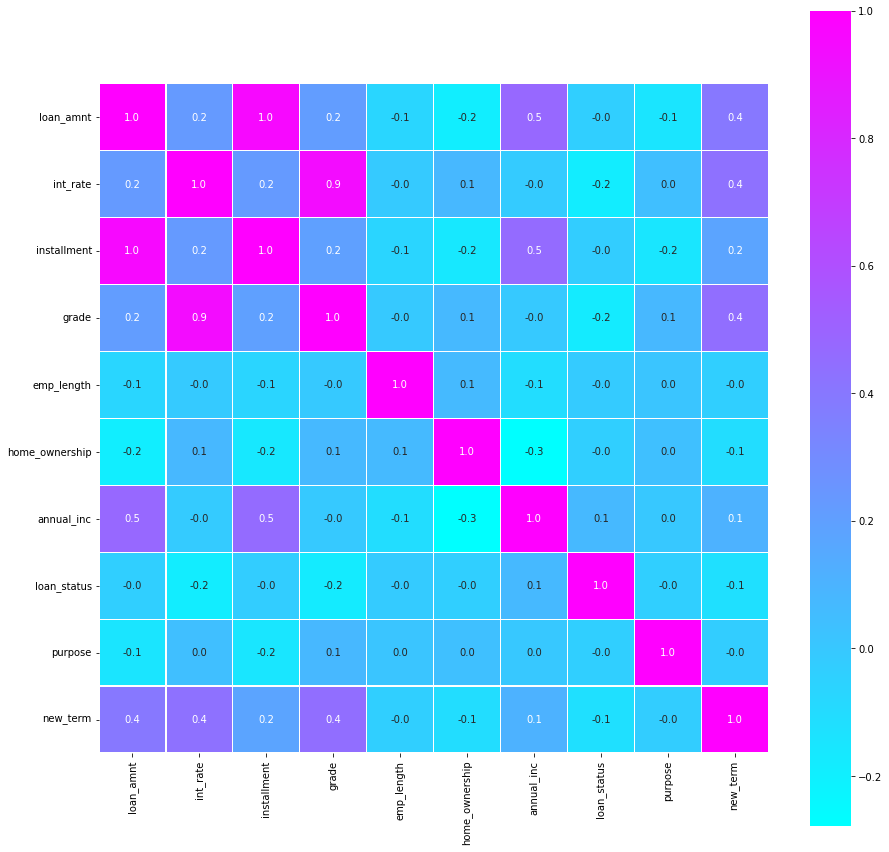

In [542]:
corr = data4.corr()
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="cool", linewidths=.5, ax=ax);

# Visualisasi

In [543]:
amt_a = data[data['loan_amnt']<5000]
amt_a['amount'] = '<5000'

amt_b = data[(data['loan_amnt']>=5000)&(data['loan_amnt']<=10000)]
amt_b['amount'] = '5000-10000'

amt_c = data[(data['loan_amnt']>10000)&(data['loan_amnt']<15000)]
amt_c['amount'] = '>10000-15000'

amt_d = data[data['loan_amnt']>=15000]
amt_d['amount'] = '>=15.000'

amount = pd.concat([amt_a, amt_b,amt_c,amt_d], axis = 0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

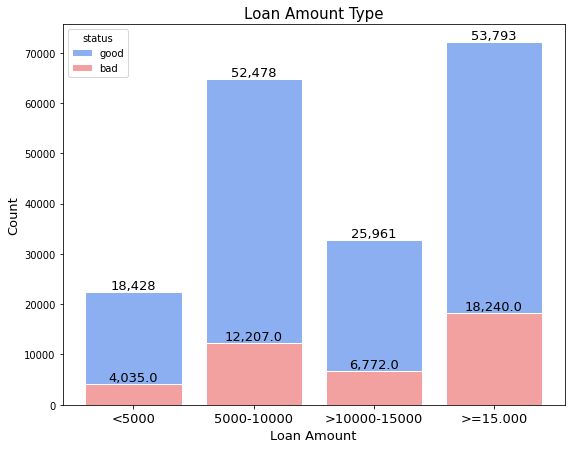

In [544]:
plt.figure(figsize = (9,7))
ax = sns.histplot(
    amount,
    x='amount',
    hue='status',
    multiple='stack',
    palette=['cornflowerblue','lightcoral'],
    edgecolor='white',
    shrink=0.8
)

ax.set_title('Loan Amount Type', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlabel('Loan Amount',fontsize = 13)
plt.ylabel('Count',fontsize = 13)

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=13)

In [545]:
int_a = data[data['int_rate']<10]
int_a['inte'] = '<10'

int_b = data[(data['int_rate']>=10)&(data['int_rate']<=15)]
int_b['inte'] = '10-15'

int_c = data[(data['int_rate']>15)&(data['int_rate']<=20)]
int_c['inte'] = '>15-20'

int_d = data[data['int_rate']>20]
int_d['inte'] = '>20'

int_rat = pd.concat([int_a, int_b,int_c,int_d], axis = 0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

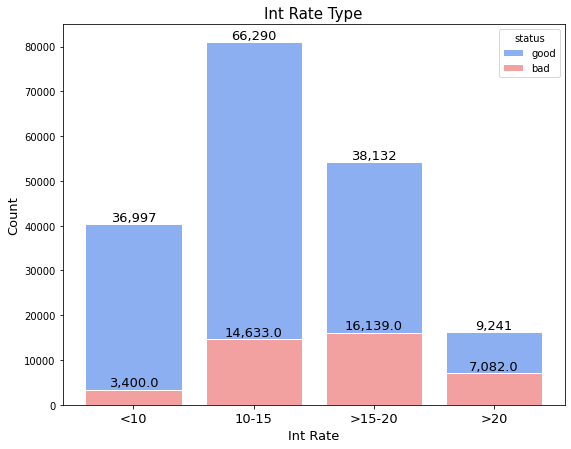

In [546]:
plt.figure(figsize = (9,7))
ax = sns.histplot(
    int_rat,
    x='inte',
    hue='status',
    multiple='stack',
    palette=['cornflowerblue','lightcoral'],
    edgecolor='white',
    shrink=0.8
)

ax.set_title('Int Rate Type', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlabel('Int Rate',fontsize = 13)
plt.ylabel('Count',fontsize = 13)

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=13)

In [547]:
installment_a = data[data['installment']<200]
installment_a['install'] = '<200'

installment_b = data[(data['installment']>=200)&(data['installment']<=400)]
installment_b['install'] = '200-400'

installment_c = data[(data['installment']>400)&(data['installment']<=600)]
installment_c['install'] = '>400-600'

installment_d = data[data['installment']>600]
installment_d['install'] = '>60'

installment = pd.concat([installment_a, installment_b,installment_c,installment_d], axis = 0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

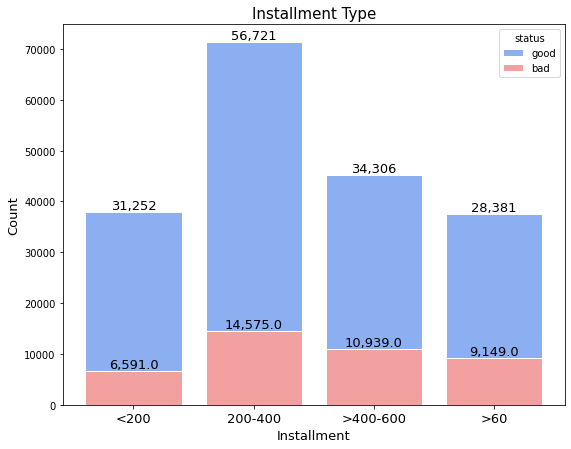

In [548]:
plt.figure(figsize = (9,7))
ax = sns.histplot(
    installment,
    x='install',
    hue='status',
    multiple='stack',
    palette=['cornflowerblue','lightcoral'],
    edgecolor='white',
    shrink=0.8
)

ax.set_title('Installment Type', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlabel('Installment',fontsize = 13)
plt.ylabel('Count',fontsize = 13)


for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=13)

In [549]:
grade_a = data[data['grade']==0]
grade_a['gradeu'] = 'A'

grade_b = data[data['grade']==1]
grade_b['gradeu'] = 'B'

grade_c = data[data['grade']==2]
grade_c['gradeu'] = 'C'

grade_d = data[data['grade']==3]
grade_d['gradeu'] = 'D'

grade_e = data[data['grade']==4]
grade_e['gradeu'] = 'E'

grade_f = data[data['grade']==5]
grade_f['gradeu'] = 'F'


grade = pd.concat([grade_a, grade_b,grade_c,grade_d,grade_e,grade_f], axis = 0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

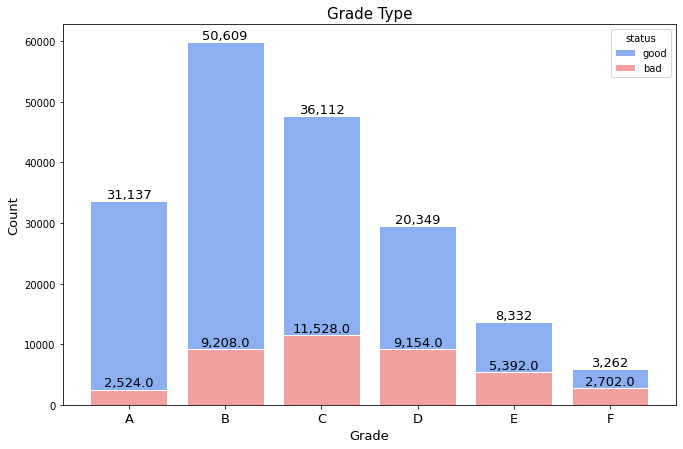

In [551]:
plt.figure(figsize = (11,7))

ax = sns.histplot(
    grade,
    x='gradeu',
    hue='status',
    multiple='stack',
    palette=['cornflowerblue','lightcoral'],
    edgecolor='white',
    shrink=0.8 , binwidth = 1
)

ax.set_title('Grade Type', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlabel('Grade',fontsize = 13)
plt.ylabel('Count',fontsize = 13)

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=13)

In [552]:
emp_length_a = data[(data['emp_length']==10)|(data['emp_length']==0)|(data['emp_length']==2)|(data['emp_length']==3)]
emp_length_a['emp_l'] = '<=3 Years'

emp_length_b =  data[(data['emp_length']==4)|(data['emp_length']==5)|(data['emp_length']==6)|(data['emp_length']==7)]
emp_length_b['emp_l'] = '4-7 Years'

emp_length_c = data[(data['emp_length']==8)|(data['emp_length']==9)|(data['emp_length']==10)]
emp_length_c['emp_l'] = '8-10 Years'

emp_length_d = data[(data['emp_length']==1)|(data['emp_length']==11)]
emp_length_d['emp_l'] = '>10 Years'

emp_length_ = pd.concat([emp_length_a, emp_length_b,emp_length_c,emp_length_d], axis = 0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

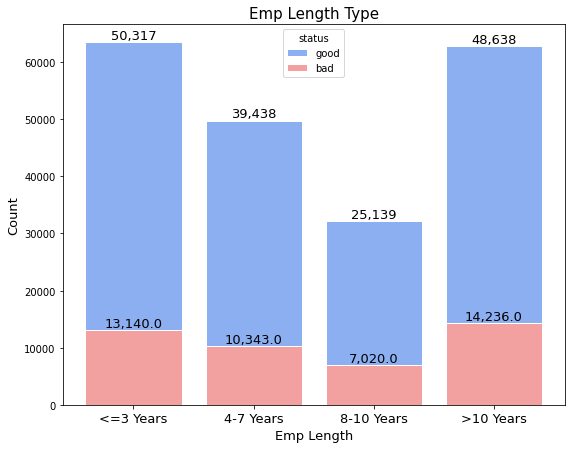

In [553]:
plt.figure(figsize = (9,7))
ax = sns.histplot(
    emp_length_,
    x='emp_l',
    hue='status',
    multiple='stack',
    palette=['cornflowerblue','lightcoral'],
    edgecolor='white',
    shrink=0.8
)

ax.set_title('Emp Length Type', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlabel('Emp Length',fontsize = 13)
plt.ylabel('Count',fontsize = 13)

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=13)

In [554]:
home_a = data[data['home_ownership']==1]
home_a['home'] = 'Mortgage'

home_b = data[data['home_ownership']==5]
home_b['home'] = 'Rent'

home_c = data[data['home_ownership']==4]
home_c['home'] = 'Own'

home_own = pd.concat([home_a, home_b,home_c], axis = 0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

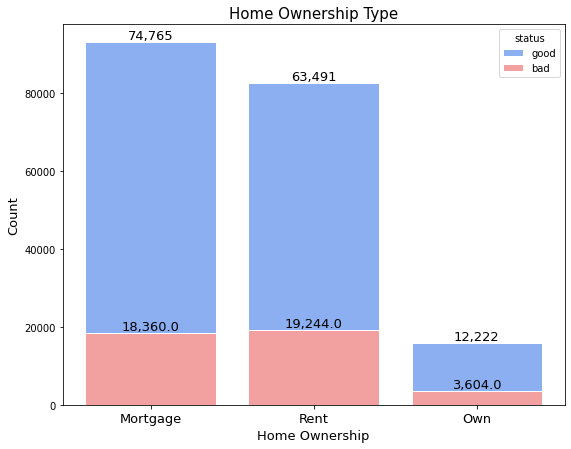

In [555]:
plt.figure(figsize = (9,7))

ax = sns.histplot(
    home_own,
    x='home',
    hue='status',
    multiple='stack',
    palette=['cornflowerblue','lightcoral'],
    edgecolor='white',
    shrink=0.8 , binwidth = 1
)

ax.set_title('Home Ownership Type', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlabel('Home Ownership',fontsize = 13)
plt.ylabel('Count',fontsize = 13)

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=13)

In [556]:
income_a = data[data['annual_inc']<30000]
income_a['ann_inc'] = '<30000'

income_b = data[(data['annual_inc']>=30000)&(data['annual_inc']<=60000)]
income_b['ann_inc'] = '30000-60000'

income_c = data[(data['annual_inc']>60000)&(data['annual_inc']<=100000)]
income_c['ann_inc'] = '>60000-100000'

income_d = data[data['annual_inc']>100000]
income_d['ann_inc'] = '>100000'

income = pd.concat([income_a, income_b,income_c,income_d], axis = 0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

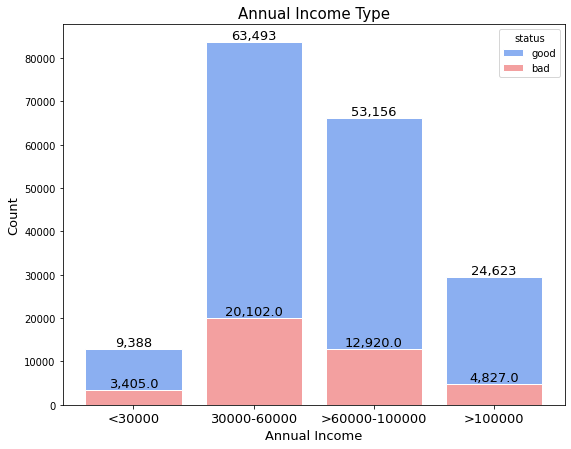

In [557]:
plt.figure(figsize = (9,7))
ax = sns.histplot(
    income,
    x='ann_inc',
    hue='status',
    multiple='stack',
    palette=['cornflowerblue','lightcoral'],
    edgecolor='white',
    shrink=0.8
)

ax.set_title('Annual Income Type', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlabel('Annual Income',fontsize = 13)
plt.ylabel('Count',fontsize = 13)

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=13)

In [560]:
purpose_a = data[data['purpose']==2]
purpose_a['purpos'] = 'Debt Consolidation'

purpose_e = data[data['purpose']==1]
purpose_e['purpos'] = 'Credit Card'

purpose = pd.concat([purpose_a, purpose_e], axis = 0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


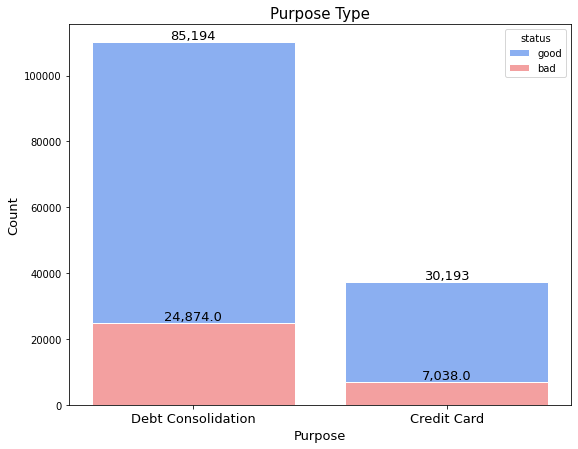

In [561]:
plt.figure(figsize = (9,7))
ax = sns.histplot(
    purpose,
    x='purpos',
    hue='status',
    multiple='stack',
    palette=['cornflowerblue','lightcoral'],
    edgecolor='white',
    shrink=0.8
)

ax.set_title('Purpose Type', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlabel('Purpose',fontsize = 13)
plt.ylabel('Count',fontsize = 13)

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=13)

In [562]:
purpose_c = data[data['purpose']==9]
purpose_c['purpos'] = 'other'

purpose_d = data[data['purpose']==4]
purpose_d['purpos'] = 'home improvement'

purpose_e = data[data['purpose']==6]
purpose_e['purpos'] = 'major purchase'


purpos = pd.concat([purpose_c, purpose_d,purpose_e], axis = 0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

[Text(0, 0, 'home improvement'),
 Text(0, 0, 'other'),
 Text(0, 0, 'major purchase')]

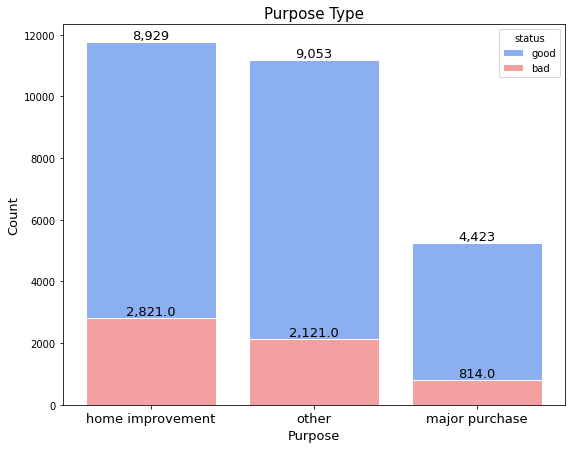

In [563]:
plt.figure(figsize = (9,7))
ax = sns.histplot(
    purpos,
    x='purpos',
    hue='status',
    multiple='stack',
    palette=['cornflowerblue','lightcoral'],
    edgecolor='white',
    shrink=0.8
)

ax.set_title('Purpose Type', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlabel('Purpose',fontsize = 13)
plt.ylabel('Count',fontsize = 13)

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=13)
ax.set_xticklabels(['home improvement','other','major purchase'])

In [564]:
purpose_f = data[data['purpose']==11]
purpose_f['purpos'] = 'small business'

purpose_g = data[data['purpose']==0]
purpose_g['purpos'] = 'car'

purpose_h = data[data['purpose']==7]
purpose_h['purpos'] = 'medical'

purpose_i = data[data['purpose']==13]
purpose_i['purpos'] = 'wedding'

purpose_j = data[data['purpose']==8]
purpose_j['purpos'] = 'moving'

purpose_k = data[data['purpose']==5]
purpose_k['purpos'] = 'house'

purpose_l = data[data['purpose']==12]
purpose_l['purpos'] = 'vacation'

purposeu = pd.concat([purpose_f,purpose_g,purpose_h,purpose_i,purpose_j,
                    purpose_k,purpose_l], axis = 0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

[Text(0, 0, 'small business'),
 Text(0, 0, 'car'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'wedding'),
 Text(0, 0, 'house'),
 Text(0, 0, 'vacation')]

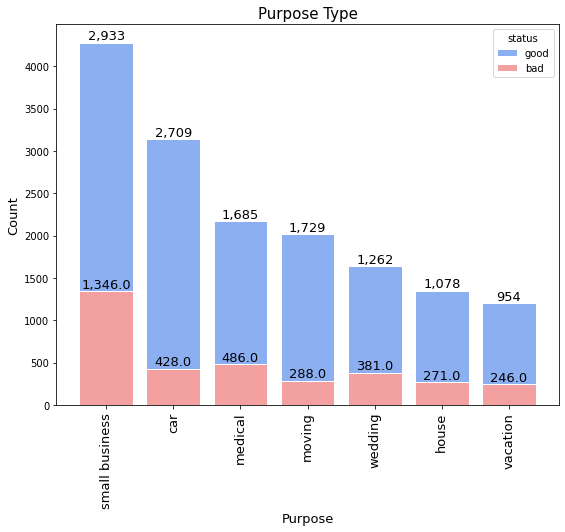

In [566]:
plt.figure(figsize = (9,7))
ax = sns.histplot(
    purposeu,
    x='purpos',
    hue='status',
    multiple='stack',
    palette=['cornflowerblue','lightcoral'],
    edgecolor='white',
    shrink=0.8
)

ax.set_title('Purpose Type', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlabel('Purpose',fontsize = 13)
plt.ylabel('Count',fontsize = 13)

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=13)
ax.set_xticklabels(['small business','car','medical','moving','wedding','house','vacation'], rotation = 90)

In [567]:
term_a = data[data['new_term']==36.0]
term_a['newterm'] = '36 Months'

term_b = data[data['new_term']==60.0]
term_b['newterm'] = '60 Months'

termm = pd.concat([term_a, term_b], axis = 0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


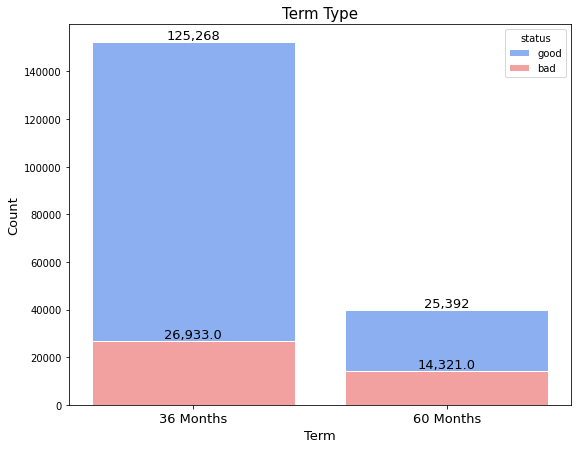

In [569]:
plt.figure(figsize = (9,7))

ax = sns.histplot(
    termm,
    x='newterm',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    hue='status',
    multiple='stack',
    palette=['cornflowerblue','lightcoral'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8 , binwidth = 1
)

ax.set_title('Term Type', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlabel('Term',fontsize = 13)
plt.ylabel('Count',fontsize = 13)

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=13)

In [574]:
data

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,status,new_term
0,5000,10.65,162.87,1,1,5,24000.0,4,1,good,36.0
1,2400,15.96,84.33,2,1,5,12252.0,4,11,good,36.0
2,10000,13.49,339.31,2,1,5,49200.0,4,9,good,36.0
3,5000,7.90,156.46,0,3,5,36000.0,4,13,good,36.0
4,3000,18.64,109.43,4,9,5,48000.0,4,0,good,36.0
...,...,...,...,...,...,...,...,...,...,...,...
191909,14450,16.29,353.63,3,0,5,33000.0,7,2,bad,60.0
191910,6000,14.49,206.50,2,4,1,80000.0,0,4,bad,36.0
191911,14000,13.98,325.62,2,0,5,40000.0,7,8,bad,60.0
191912,33950,20.99,1278.90,4,9,5,125000.0,5,2,bad,36.0


In [580]:
data.drop('loan_status',axis=1,inplace=True)

In [602]:
data['status'] = encoder.fit_transform(data['status'])

In [604]:
setelah_status = data['status'].value_counts()
print('Jumlah status setelah encoding: ', setelah_status)

Jumlah status setelah encoding:  1    150660
0     41254
Name: status, dtype: int64


# Modeling
Selanjutnya adalah tahap modelling. Disini kita akan menggunakan beberapa model yaitu logistic regresssion,  decision tree, random forest, KNN dan naive bayes. Disini juga dilakukan proses cross validation untuk menambah variasi permodelan

In [570]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [584]:
X = data.drop('status',axis=1)
y = data['status']

train_ratio = 0.6  # train set 60%
validation_ratio = 0.2   # validation set 20%
test_ratio = 0.2  # test set 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [585]:
print(f"Train features: {X_train.shape}")
print(f"Train target: {y_train.shape}")
print(f"Validation features: {X_val.shape}")
print(f"Validation target: {y_val.shape}")
print(f"Test features: {X_test.shape}")
print(f"Test target: {y_test.shape}")

Train features: (115148, 9)
Train target: (115148,)
Validation features: (38383, 9)
Validation target: (38383,)
Test features: (38383, 9)
Test target: (38383,)


In [586]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lr_pred = logreg.predict(X_val)
acc_log = round(logreg.score(X_train, y_train)*100,2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


78.28

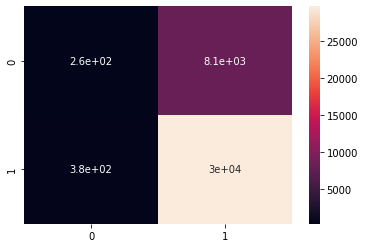

In [587]:
from sklearn.metrics import confusion_matrix

cmlr = confusion_matrix(y_val, lr_pred)
sns.heatmap(cmlr, annot=True)

In [588]:
from sklearn.metrics import classification_report
print(classification_report(y_val,lr_pred))

              precision    recall  f1-score   support

           0       0.41      0.03      0.06      8349
           1       0.79      0.99      0.88     30034

    accuracy                           0.78     38383
   macro avg       0.60      0.51      0.47     38383
weighted avg       0.70      0.78      0.70     38383



In [589]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)
acc_knn = round(knn.score(X_train, y_train)*100,2)
acc_knn

81.64

              precision    recall  f1-score   support

           0       0.32      0.13      0.18      8349
           1       0.79      0.92      0.85     30034

    accuracy                           0.75     38383
   macro avg       0.55      0.53      0.52     38383
weighted avg       0.69      0.75      0.71     38383



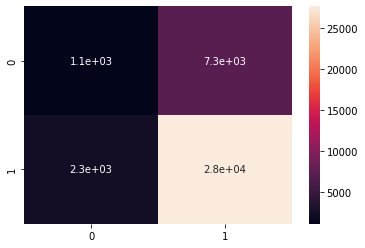

In [590]:
cmknn = confusion_matrix(y_val, knn_pred)
sns.heatmap(cmknn, annot=True)
print(classification_report(y_val,knn_pred))

In [591]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_val)
acc_nb = round(nb.score(X_train, y_train)*100,2)
acc_nb

75.04

              precision    recall  f1-score   support

           0       0.40      0.31      0.35      8349
           1       0.82      0.87      0.84     30034

    accuracy                           0.75     38383
   macro avg       0.61      0.59      0.60     38383
weighted avg       0.73      0.75      0.74     38383



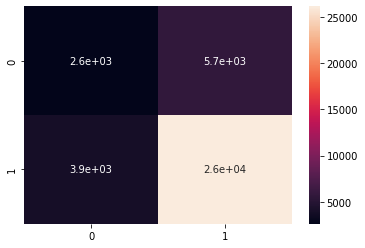

In [592]:
cmnb = confusion_matrix(y_val, nb_pred)
sns.heatmap(cmnb, annot=True)
print(classification_report(y_val,nb_pred))

In [593]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_val)
acc_dtree = round(dtree.score(X_train, y_train)*100,2)
acc_dtree

99.81

              precision    recall  f1-score   support

           0       0.28      0.30      0.29      8349
           1       0.80      0.79      0.79     30034

    accuracy                           0.68     38383
   macro avg       0.54      0.54      0.54     38383
weighted avg       0.69      0.68      0.68     38383



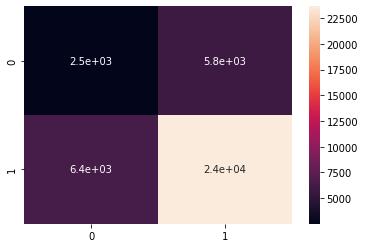

In [594]:
cmdt = confusion_matrix(y_val, dtree_pred)
sns.heatmap(cmdt, annot=True)
print(classification_report(y_val,dtree_pred))

In [595]:
rforest = RandomForestClassifier(n_estimators = 100)
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_val)
acc_rforest = round(rforest.score(X_train, y_train)*100,2)
acc_rforest

99.81

              precision    recall  f1-score   support

           0       0.42      0.15      0.22      8349
           1       0.80      0.94      0.87     30034

    accuracy                           0.77     38383
   macro avg       0.61      0.54      0.54     38383
weighted avg       0.72      0.77      0.72     38383



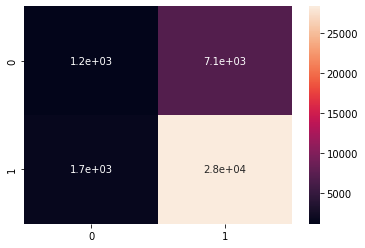

In [596]:
cmrf = confusion_matrix(y_val, rforest_pred)
sns.heatmap(cmrf, annot=True)
print(classification_report(y_val,rforest_pred))

Pada proses training, model yang memberikan nilai akurasi tinggi yaitu model decision tree dan random forest dimana nilai akurasi dari kedua model tersebut sama. Kita pilih salah satu dari dua model dengan nilai akurasi tinggi tersebut untuk dilakukan proses prediksi yaitu model random forest

In [597]:
rforest = RandomForestClassifier(n_estimators = 100)
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
acc_rforest_2 = round(rforest.score(X_train, y_train)*100,2)
acc_rforest_2

99.81

              precision    recall  f1-score   support

           0       0.22      0.08      0.11      8349
           1       0.78      0.92      0.85     30034

    accuracy                           0.74     38383
   macro avg       0.50      0.50      0.48     38383
weighted avg       0.66      0.74      0.69     38383



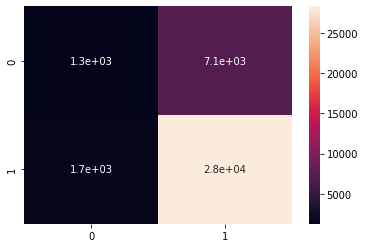

In [598]:
cmrf2 = confusion_matrix(y_test, rforest_pred)
sns.heatmap(cmrf2, annot=True)
print(classification_report(y_val,rforest_pred))

In [599]:
X_test['status'] = rforest_pred
X_test.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,new_term,status
45755,8000,24.50,232.48,5,2,5,68000.0,12,60.0,1
116970,12000,12.12,399.26,1,3,5,50000.0,2,36.0,1
185232,29850,17.14,744.10,3,1,1,68000.0,2,60.0,1
36535,35000,22.90,984.66,4,2,1,95000.0,2,60.0,0
188535,3350,15.61,117.14,3,1,1,52000.0,2,36.0,1


In [600]:
hasil = pd.DataFrame(X_test)
hasil

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,new_term,status
45755,8000,24.50,232.48,5,2,5,68000.0,12,60.0,1
116970,12000,12.12,399.26,1,3,5,50000.0,2,36.0,1
185232,29850,17.14,744.10,3,1,1,68000.0,2,60.0,1
36535,35000,22.90,984.66,4,2,1,95000.0,2,60.0,0
188535,3350,15.61,117.14,3,1,1,52000.0,2,36.0,1
...,...,...,...,...,...,...,...,...,...,...
187787,18000,15.61,434.01,3,2,1,82500.0,1,60.0,1
49453,24000,13.67,816.43,1,11,1,60000.0,1,36.0,1
191038,15000,11.67,495.86,1,11,5,70000.0,2,36.0,1
56190,10000,15.22,347.74,2,5,5,40000.0,2,36.0,1


Selanjutnya adalah analisis dari hasil prediksi berdasakan tiap kriteria dalam kolom loan status. Analisis menggunakan teknik visualisasi yang akan menggambarkan persebaran jumlah variabel independent terhadap variabel dependent tiap kriteria pada loan_status

#  Fully paid & Doesn't meet credit policy. Status : fully paid


In [608]:
# Kita coba menganalisis data orang dengan status pinjaman fully paid dan Doesn't meet credit policy. Status : fully paid
good_ = hasil[hasil['status']==1]
good_

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,new_term,status
45755,8000,24.50,232.48,5,2,5,68000.0,12,60.0,1
116970,12000,12.12,399.26,1,3,5,50000.0,2,36.0,1
185232,29850,17.14,744.10,3,1,1,68000.0,2,60.0,1
188535,3350,15.61,117.14,3,1,1,52000.0,2,36.0,1
116177,20000,7.90,625.81,0,0,1,180000.0,2,36.0,1
...,...,...,...,...,...,...,...,...,...,...
187787,18000,15.61,434.01,3,2,1,82500.0,1,60.0,1
49453,24000,13.67,816.43,1,11,1,60000.0,1,36.0,1
191038,15000,11.67,495.86,1,11,5,70000.0,2,36.0,1
56190,10000,15.22,347.74,2,5,5,40000.0,2,36.0,1


In [609]:
df_cat = good_[['loan_amnt','int_rate','installment','grade','emp_length','home_ownership','annual_inc','purpose','new_term']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


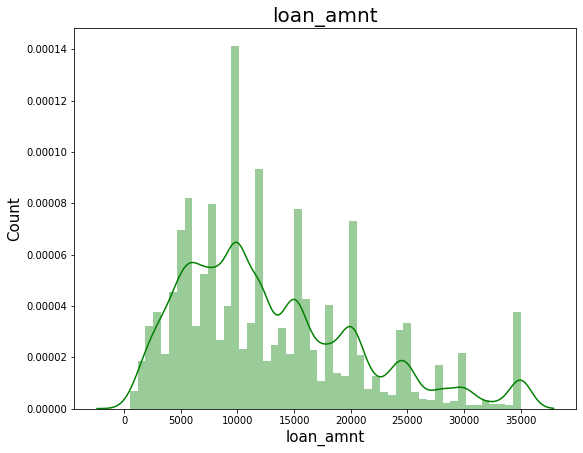

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


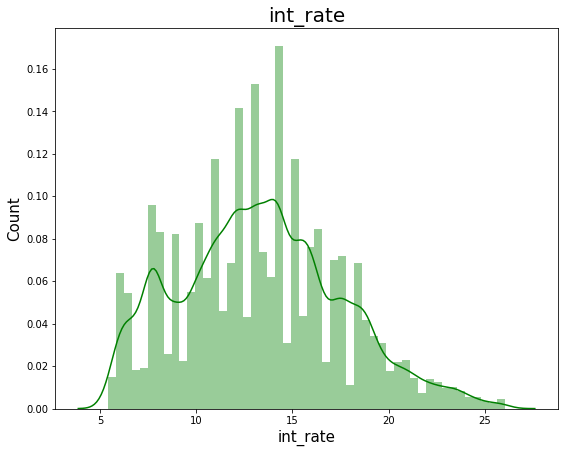

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


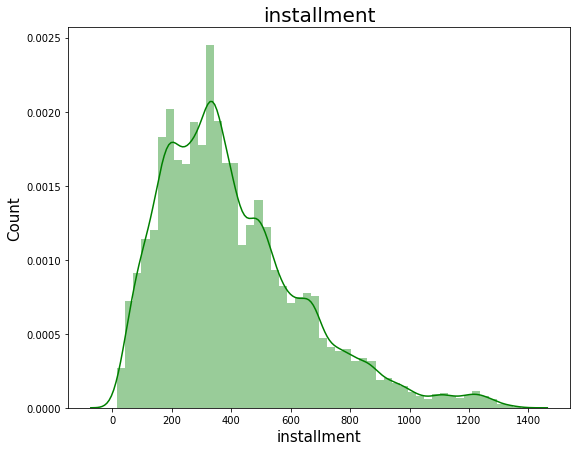

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


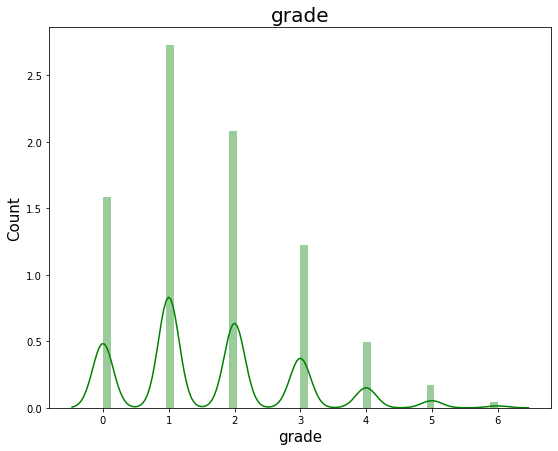

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


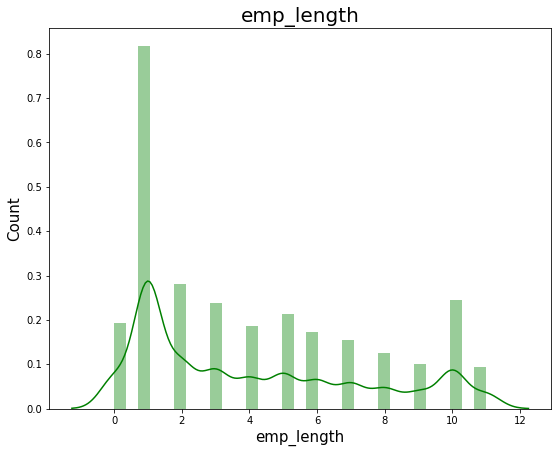

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


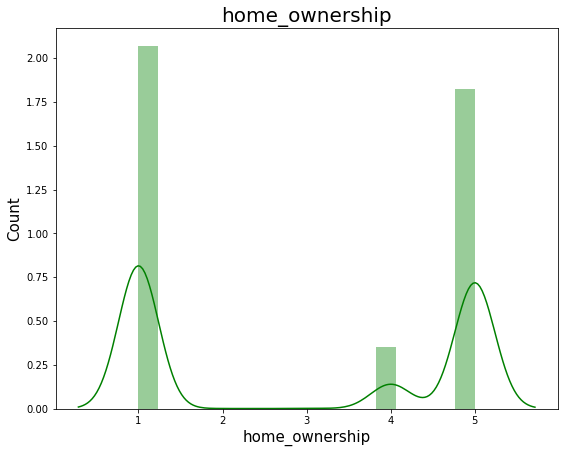

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


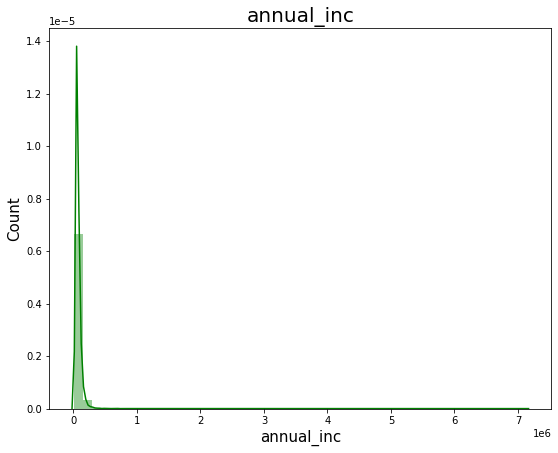

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


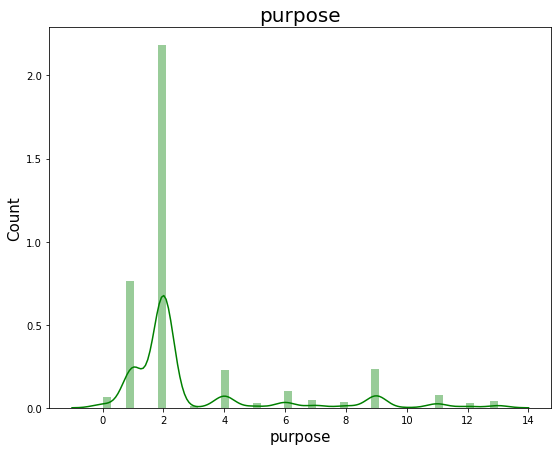

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


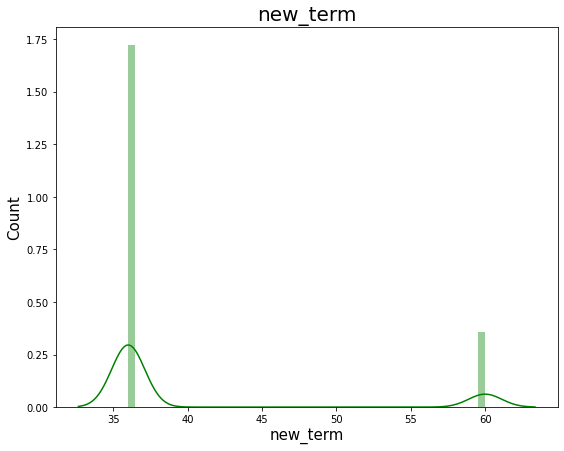

In [610]:
for i in df_cat.columns:
    plt.figure(figsize = (9,7))
    sns.distplot(df_cat[i],color= 'g')
    plt.title(i)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

# Charged off dan Doesn't meet credit policy. Status : charged off

In [611]:
# Kita coba menganalisis data orang dengan status pinjaman charged off dan Doesn't meet credit policy. Status : charged off
bad = hasil[hasil['status']==0]
bad

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,new_term,status
36535,35000,22.90,984.66,4,2,1,95000.0,2,60.0,0
148956,18950,25.83,565.47,6,3,1,56000.0,2,60.0,0
141374,21000,22.15,581.79,4,3,1,70000.0,2,60.0,0
697,18000,15.27,430.78,2,2,1,50000.0,2,60.0,0
57115,12000,22.70,336.23,4,1,1,110000.0,1,60.0,0
...,...,...,...,...,...,...,...,...,...,...
42916,6625,21.00,249.60,4,7,5,35000.0,2,36.0,0
172261,21000,19.05,545.33,3,1,5,58750.0,2,60.0,0
180910,12000,17.27,429.45,3,1,5,37000.0,9,36.0,0
172101,11575,18.75,422.84,3,6,5,35000.0,2,36.0,0


In [612]:
df_charged_off = bad[['loan_amnt','int_rate','installment','grade','emp_length','home_ownership','annual_inc','purpose','new_term']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


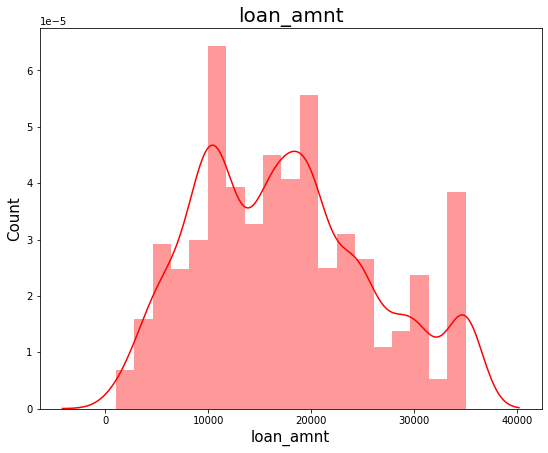

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


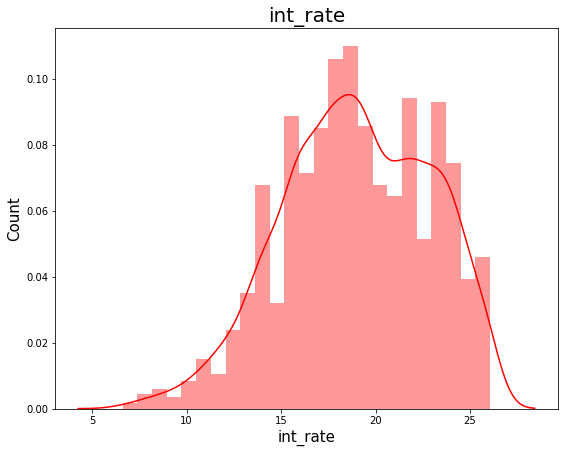

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


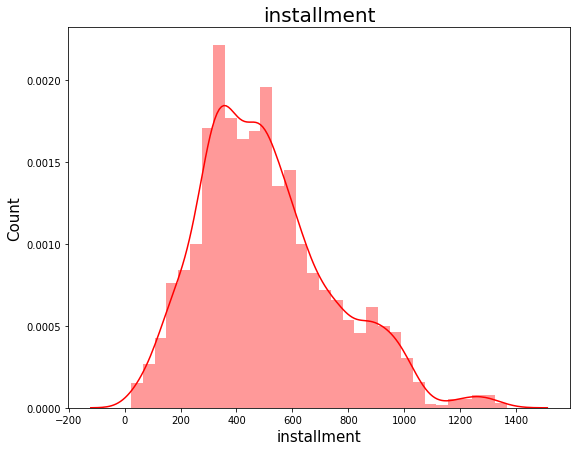

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


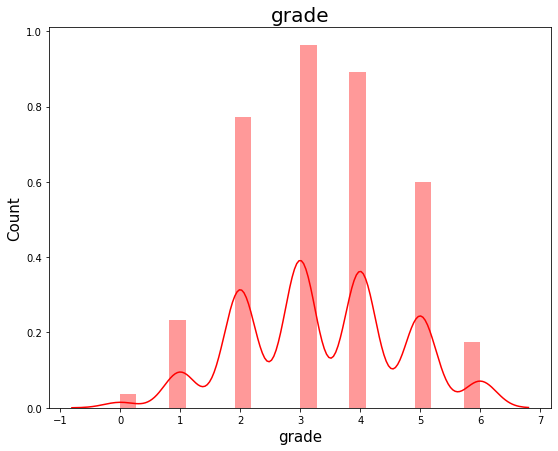

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


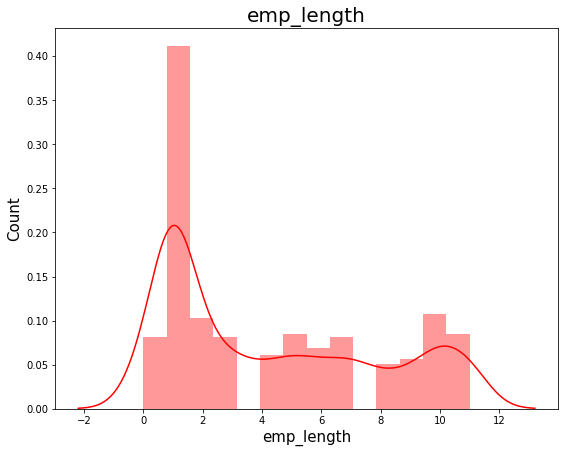

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


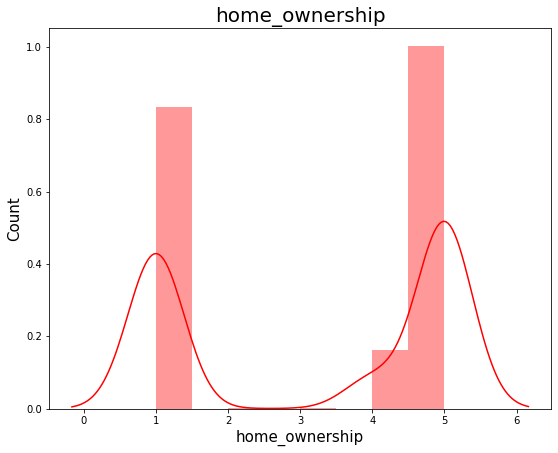

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


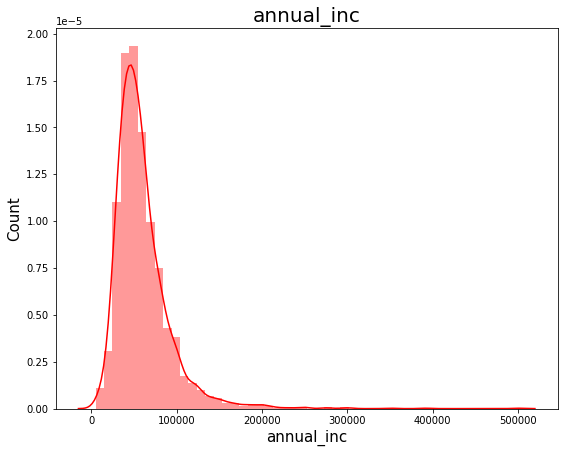

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


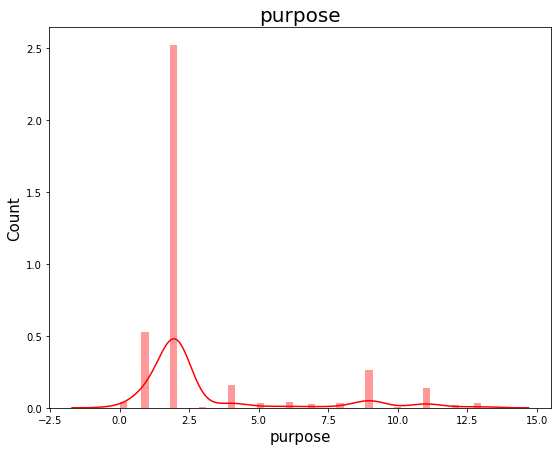

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


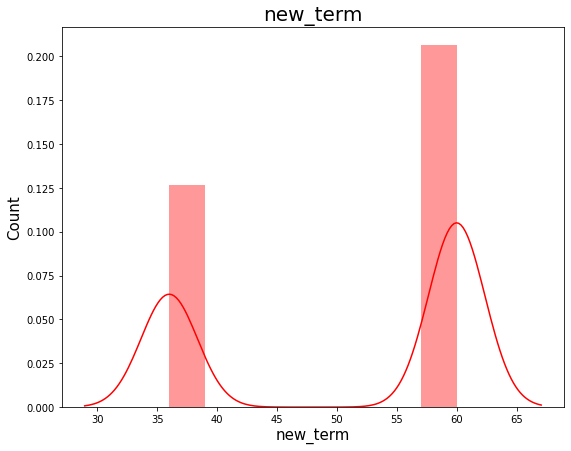

In [613]:
for i in df_charged_off.columns:
    plt.figure(figsize = (9,7))
    sns.distplot(df_charged_off[i],color= 'r')
    plt.title(i)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

# Prediction

In [606]:
loan_amnt       = input('loan_amnt       : ')
int_rate        = input('int_rate        : ')
installment     = input('installment     : ')
grade           = input('grade           : ')
emp_length      = input('emp_length      : ')
home_ownership  = input('home_ownership  : ')
annual_inc      = input('annual_inc      : ')
purpose         = input('purpose         : ')
term            = input('term            : ')

pred = rforest.predict([[loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,term]])

if pred==1:
  print('\n Loan status = good \n')
elif pred ==0:
  print('\n Loan status = bad \n')

loan_amnt       : 10000
int_rate        : 15
installment     : 300
grade           : 3
emp_length      : 4
home_ownership  : 1
annual_inc      : 60000
purpose         : 3
term            : 2

 Loan status = good 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Pada dataset ini, yang merupakan variabel dependen adalah loan_status dan selain itu merupakan independent variabel. Berdasarkan heatmap di atas, keterkaitan antara variabel independent dan variabel dependent tidak terlalu besar yang ditandai dengan nilai korelasi yang tidak terlalu tinggi. Namun terdapat beberapa pasangan variabel yang memiliki keterkaitan yang cukup tinggi. Diantara beberapa variabel yang berkaitan, pasangan variabel yang memiliki keterkaitan tinggi yang datang dari pemberi pinjaman dengan peminjam adalah antara annual income dengan loan amount. Hal ini memberikan keterangan bahwa semakin tinggi pendapatan seseorang maka nilai pinjamannya semakin besar. Namun hubungan antara home ownership dan loan amount tidak terlalu signifikan